<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">22.418 · Aprenentatge automàtic</p>
<p style="margin: 0; text-align:right;">Grau en Ciència de Dades Aplicada</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis de Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Module 3: Example of bagging

In this notebook, we will use the `BaggingClassifier` algorithm implemented in `scikit-learn` to create to classify the instances in the Iris flower dataset.


Let's import the required classes:

In [1]:
# Import packages
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Now, we load the data:

In [2]:
# Import data
iris = datasets.load_iris()
x = iris.data
y = iris.target

And split in train and test:

In [3]:
# Split train and test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

It's normally a good practice to check that the data you have is what you expected. Let's see the shape of our data:

In [4]:
print('xtrain shape: ', xtrain.shape)
print('ytrain shape: ', xtrain.shape)
print('xtest shape: ', xtest.shape)
print('ytest shape: ', xtest.shape)

xtrain shape:  (100, 4)
ytrain shape:  (100, 4)
xtest shape:  (50, 4)
ytest shape:  (50, 4)


We will now create the classifier. To do so, we first need to create our base classifier using the `DecisionTree` class, and then use the `BaggingClassifier` class to implement the bagging process itself.

The `BaggingClassifier` class has some attributes that we can tune to specify the type of classifier used as base, the number of base classifiers or if we want to *bootstrap* the data.

```
estimator: object, default=None
The base estimator to fit on random subsets of the dataset. If None, then the base estimator is a DecisionTreeClassifier.

n_estimators: int, default=10
The number of base estimators in the ensemble.

max_samples: int or float, default=1.0
The number of samples to draw from X to train each base estimator (with replacement by default, see bootstrap for more details).

If int, then draw max_samples samples.
If float, then draw max_samples * X.shape[0] samples.
max_features: int or float, default=1.0
The number of features to draw from X to train each base estimator ( without replacement by default, see bootstrap_features for more details).

If int, then draw max_features features.
If float, then draw max_features * X.shape[1] features.
bootstrap: bool, default=True
Whether samples are drawn with replacement. If False, sampling without replacement is performed.

bootstrap_features: bool, default=False
Whether features are drawn with replacement.

...
```

In [5]:
base_model = DecisionTreeClassifier(random_state=42)
bagging_model = BaggingClassifier(estimator=base_model, n_estimators=10, random_state=0)

Let's check the behaviour of the DecisionTree model and the one leveraging Bagging.

In [6]:
print('5-fold cross validation:\n')

labels = ['Decision Tree', 'Bagging']

for clf, label in zip([base_model, bagging_model], labels):

    scores = model_selection.cross_val_score(clf, xtrain, ytrain, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

Accuracy: 0.91 (+/- 0.07) [Decision Tree]
Accuracy: 0.93 (+/- 0.07) [Bagging]


As was expected, the model leveraging Bagging improves the accuracy of the vanila Decision Tree.

Let's predict the labels for the test set. Notice that when we make the predictions on the test set, we don't use cross-validation any more. Thus, we use a specific model trained once on the training set. Cross-validation is mainly used to compare different algorithms for different splits of the same dataset.

In [7]:
# Predict Output 
bagging_model.fit(xtrain, ytrain)
preds = bagging_model.predict(xtest)

Let's see the result. We'll compute the confusion matrix, which contains information about true positives/negatives and false positives/negatives

Text(110.44999999999997, 0.5, 'Predicted')

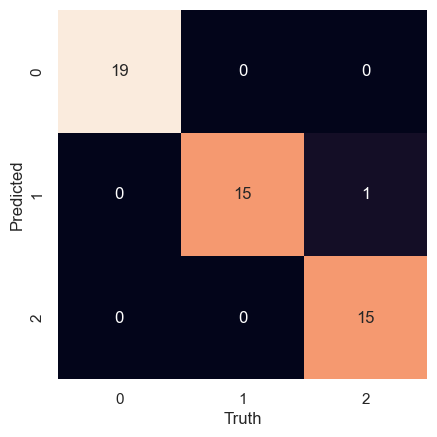

In [8]:
# Plot Confusion Matrix
mat = confusion_matrix(preds, ytest)
names = np.unique(preds)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')